In [ ]:
%matplotlib inline 

In [9]:
import sys
sys.path.insert(0, "../script/")
sys.path.insert(0, "../cluster/")
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
from sklearn.neighbors import NearestNeighbors
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import seaborn as sns
sns.set(color_codes=True)
from sklearn import linear_model

ImportError: No module named seaborn

In [24]:
sitelist = ["asp", "douban", "stackexchange", "tripadvisor","youtube"]
feat_dict = {}
for site in sitelist:
    feat_dict[site] = []
    with open("./feature/new_" + site + "/log_tf_idf.txt") as fin:
        for line in fin:
            _, vector = line.strip().split(':')
            vector = [float(x) for x in vector.split()]
            feat_dict[site].append(vector)
    feat_dict[site] = np.asarray(feat_dict[site])

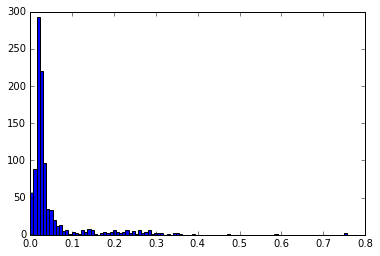

0.159034404331


In [33]:
site="tripadvisor"
X = feat_dict[site]

X = normalize(X, norm='l1')

K = 100
kdist_list = []
nbrs = NearestNeighbors(n_neighbors=K, algorithm="ball_tree").fit(X)
distances, indices = nbrs.kneighbors(X)
for dist in distances:
    kdist_list += dist.tolist()[4:5]
    
n, bins, _ = plt.hist(kdist_list, bins=100)
# plt.yscale('log')
plt.show()

y = np.array([np.log(x) if x > 0 else 0 for x in n])
x = np.array(bins[1:]).reshape(-1, 1)
threshold = np.mean(n[100/3:])

for idx, val in enumerate(n):
    if val < threshold and idx > 5:
        eps = bins[idx]
        break
print eps

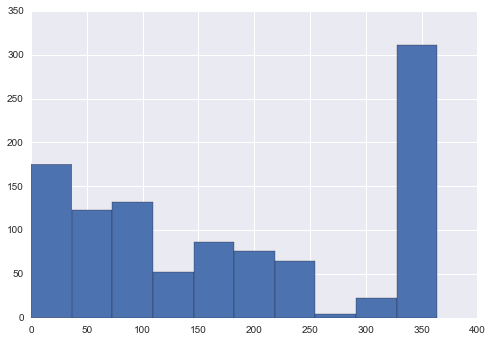

array([   0. ,   36.4,   72.8,  109.2,  145.6,  182. ,  218.4,  254.8,
        291.2,  327.6,  364. ])

In [45]:
nbrs = NearestNeighbors(radius=eps, algorithm="ball_tree").fit(X)
distances, indices = nbrs.radius_neighbors(X, radius=eps)
nbr_num_list = []
for ind in indices:
    nbr_num_list.append(len(ind) - 1)
n, bins, _ = plt.hist(nbr_num_list, bins=10)
plt.show()
bins